<center><h1></h1></center>
<center>
    <h1 style="color: "blue; font-weight: bold;">Dates Fruit Classification</h1>
    <img src="https://www.shutterstock.com/image-photo/dates-dattes-palm-fruit-wooden-600nw-2141961519.jpg"
         alt="Project Image"
         style="width: 500px; margin-top: 20px;">
</center>











## **Important** **Necessary** **Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib

## **Data Collection**

In [ ]:
excel_file = "Date_Fruit_Datasets.xlsx"  # Adjust the path and filename

# Load the Excel file
excel_data = pd.read_excel(excel_file)

# **Exploratory** **Data** **Analysis**

In [ ]:
excel_data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:
excel_data.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY
897,343792,2289.2720,823.8438,534.7757,0.7607,661.6113,0.9781,351472,0.6941,1.5405,...,2.5138,3.0369,3.0865,-31983476736,-20482514944,-21219354624,47.3454,38.6966,39.6738,SOGAY


In [ ]:
excel_data.shape

(898, 35)

In [ ]:
print("Columns:", excel_data.columns)  # Replace with arff_df.columns for ARFF


Columns: Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')


In [ ]:
print("Number of rows:", len(excel_data))

Number of rows: 898


In [ ]:
print("Data types:", excel_data.dtypes)

Data types: AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
MeanRR           float64
MeanRG           float64
MeanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
SkewRR           float64
SkewRG           float64
SkewRB           float64
KurtosisRR       float64
KurtosisRG       float64
KurtosisRB       float64
EntropyRR          int64
EntropyRG          int64
EntropyRB          int64
ALLdaub4RR       float64
ALLdaub4RG       float64
ALLdaub4RB       float64
Class             object
dtype: object


In [ ]:
print("Missing values per column:")
print(excel_data.isnull().sum())

Missing values per column:
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


In [ ]:
excel_data.duplicated().sum()

0

In [ ]:
print("Statistical summary of numerical columns:")
print(excel_data.describe())

Statistical summary of numerical columns:
                AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  10881

In [ ]:
excel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [ ]:
print("Class distribution:")
print(excel_data['Class'].value_counts())

Class distribution:
Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64


# **Data** **Visualization**

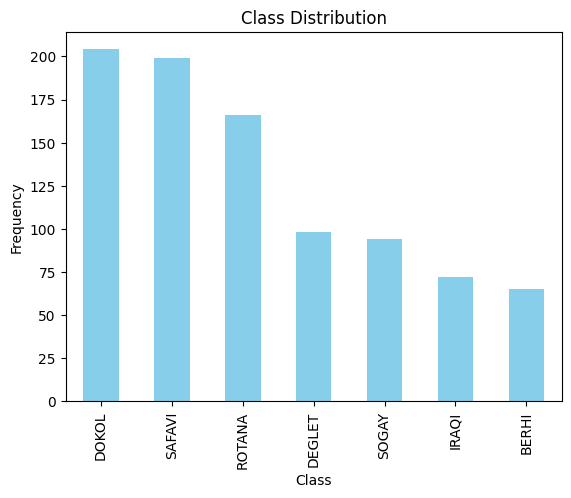

In [ ]:
excel_data['Class'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# **Data** **Preprocessing**

In [ ]:
# Encode Class column
label_encoder = LabelEncoder()
excel_data['Class'] = label_encoder.fit_transform(excel_data['Class'])
print("Encoded Classes:", label_encoder.classes_)
joblib.dump(label_encoder, 'label_encoder.pkl')


Encoded Classes: ['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


['label_encoder.pkl']

In [ ]:

# Define features (exclude Class)
features = excel_data.drop(columns=['Class'])
target = excel_data['Class']

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

Data Splitting


In [ ]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 718
Testing samples: 180


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

# Convert target to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Print data shapes
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")


Training Data Shape: (718, 34)
Testing Data Shape: (180, 34)
Training Labels Shape: (718, 7)
Testing Labels Shape: (180, 7)


#  **Wide** **Neural** **Network** **for** **Multi-Class** **Classification**

In [ ]:
wide_model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),  # Wide layer
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile the model
wide_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
wide_history = wide_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3165 - loss: 1.8254 - val_accuracy: 0.6500 - val_loss: 1.5253
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5792 - loss: 1.4985 - val_accuracy: 0.6556 - val_loss: 1.2884
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6181 - loss: 1.3018 - val_accuracy: 0.6556 - val_loss: 1.1157
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6362 - loss: 1.1110 - val_accuracy: 0.6722 - val_loss: 0.9797
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6634 - loss: 0.9880 - val_accuracy: 0.6889 - val_loss: 0.8818
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6875 - loss: 0.9291 - val_accuracy: 0.7056 - val_loss: 0.8098
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6948 - loss: 0.8451 - val_accuracy: 0.7167 - val_loss: 0.7414
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7452 - loss: 0.7644 - val_accuracy: 0.7722 - val_loss: 0.7040
Ep

In [ ]:
wide_loss, wide_accuracy = wide_model.evaluate(X_test, y_test, verbose=0)
print(f"Wide Model - Test Accuracy: {wide_accuracy * 100:.2f}%")
print(f"Wide Model - Test Loss: {wide_loss:.4f}")

Wide Model - Test Accuracy: 92.22%
Wide Model - Test Loss: 0.3315


**DataVisualiztion** **for** **Wide** **Neural** **Network**

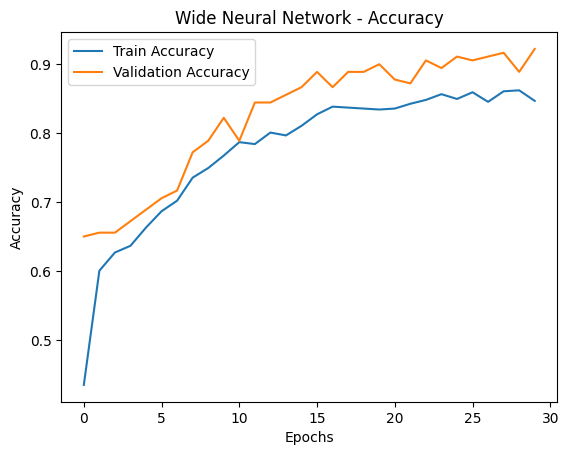

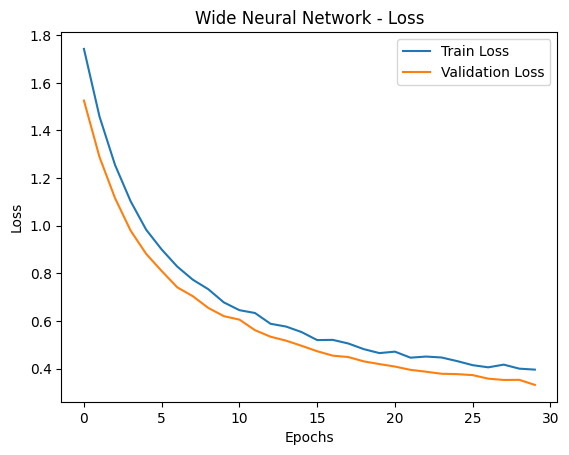

In [ ]:
plt.plot(wide_history.history['accuracy'], label='Train Accuracy')
plt.plot(wide_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Wide Neural Network - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(wide_history.history['loss'], label='Train Loss')
plt.plot(wide_history.history['val_loss'], label='Validation Loss')
plt.title('Wide Neural Network - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

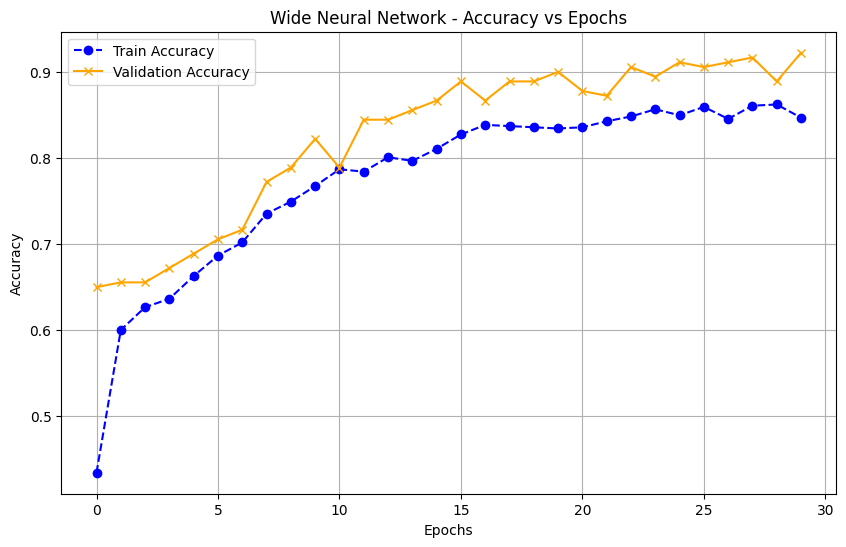

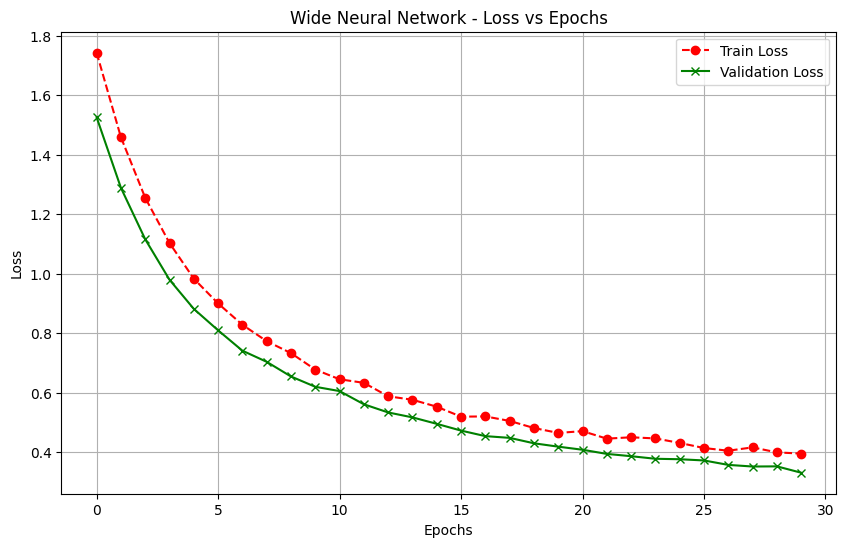

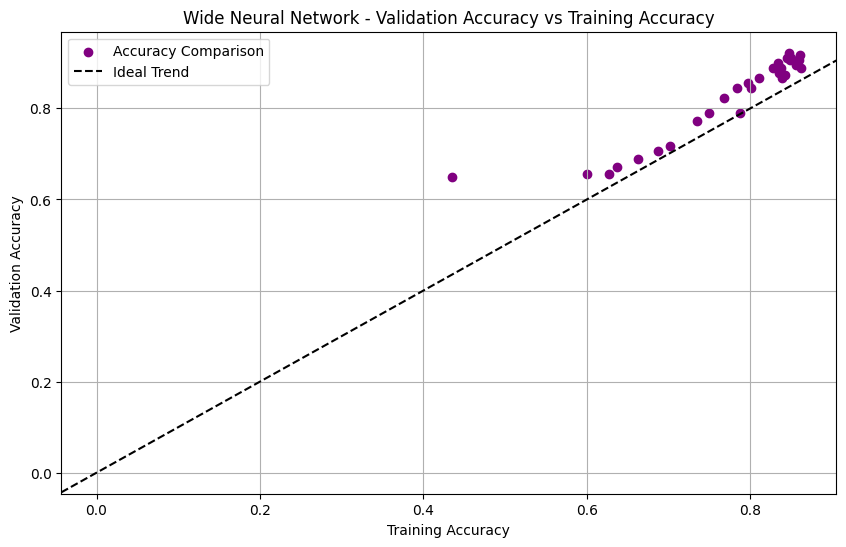

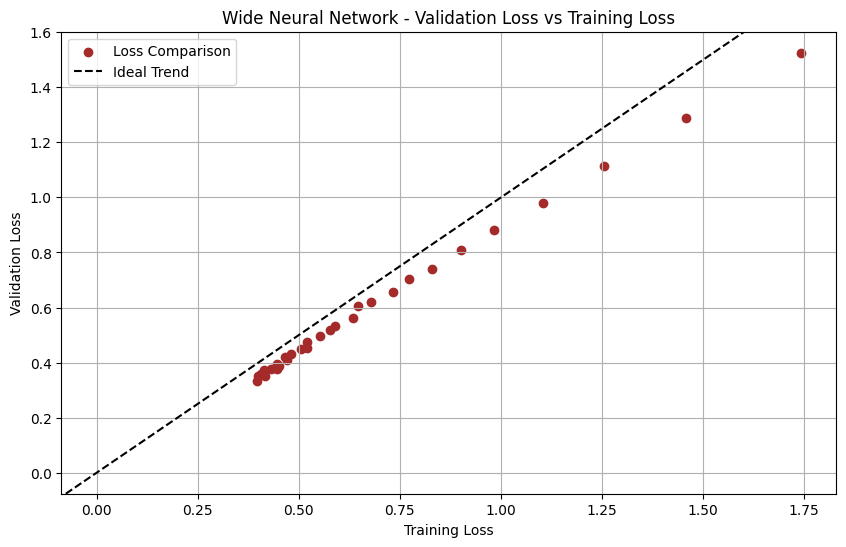

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Accuracy vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(wide_history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='--', marker='o')
plt.plot(wide_history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='-', marker='x')
plt.title('Wide Neural Network - Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Loss vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(wide_history.history['loss'], label='Train Loss', color='red', linestyle='--', marker='o')
plt.plot(wide_history.history['val_loss'], label='Validation Loss', color='green', linestyle='-', marker='x')
plt.title('Wide Neural Network - Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Validation Accuracy vs Training Accuracy (Comparison)
plt.figure(figsize=(10, 6))
plt.scatter(wide_history.history['accuracy'], wide_history.history['val_accuracy'], color='purple', label='Accuracy Comparison')
plt.title('Wide Neural Network - Validation Accuracy vs Training Accuracy')
plt.xlabel('Training Accuracy')
plt.ylabel('Validation Accuracy')
plt.axline((0, 0), slope=1, color='black', linestyle='--', label='Ideal Trend')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Validation Loss vs Training Loss (Comparison)
plt.figure(figsize=(10, 6))
plt.scatter(wide_history.history['loss'], wide_history.history['val_loss'], color='brown', label='Loss Comparison')
plt.title('Wide Neural Network - Validation Loss vs Training Loss')
plt.xlabel('Training Loss')
plt.ylabel('Validation Loss')
plt.axline((0, 0), slope=1, color='black', linestyle='--', label='Ideal Trend')
plt.legend()
plt.grid(True)
plt.show()


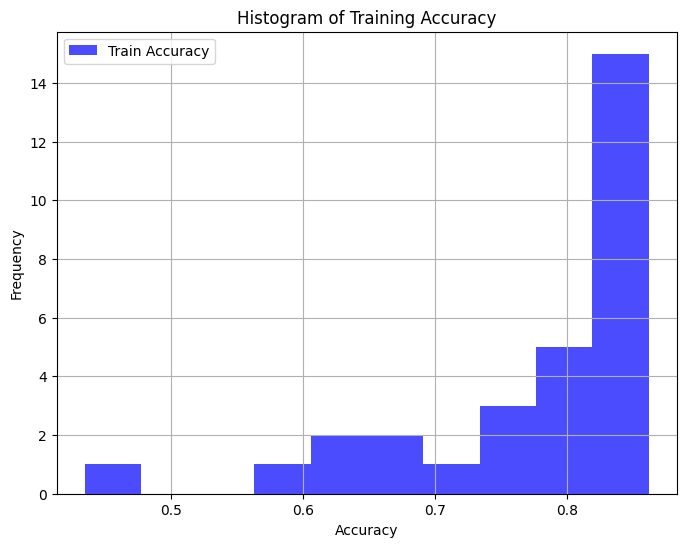

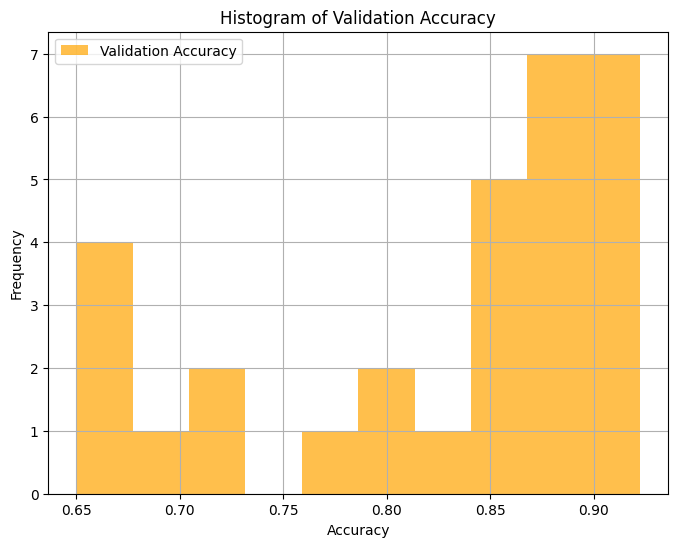

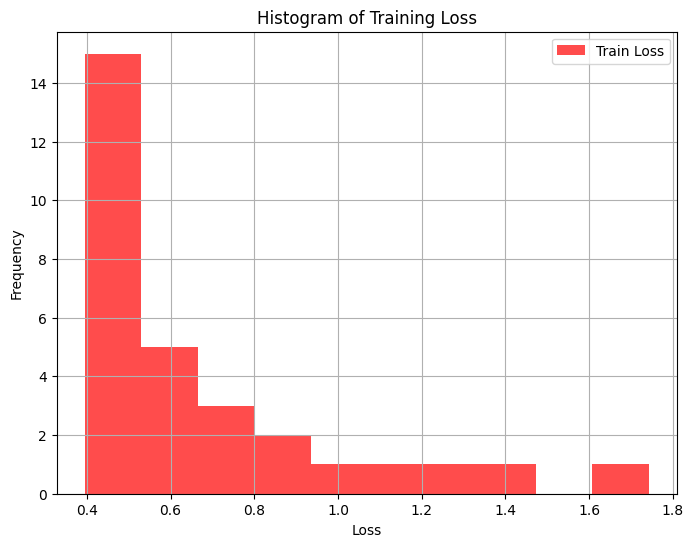

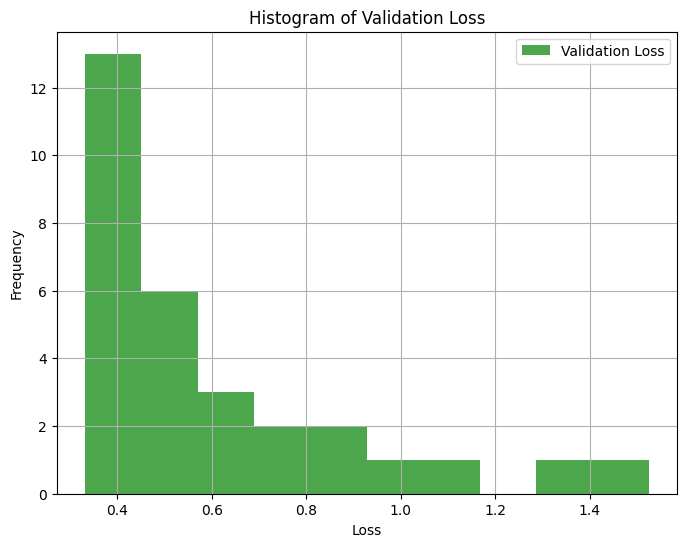

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics
train_accuracy = wide_history.history['accuracy']
val_accuracy = wide_history.history['val_accuracy']
train_loss = wide_history.history['loss']
val_loss = wide_history.history['val_loss']

# Plot 1: Histogram of Training Accuracy
plt.figure(figsize=(8, 6))
plt.hist(train_accuracy, bins=10, color='blue', alpha=0.7, label='Train Accuracy')
plt.title('Histogram of Training Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Histogram of Validation Accuracy
plt.figure(figsize=(8, 6))
plt.hist(val_accuracy, bins=10, color='orange', alpha=0.7, label='Validation Accuracy')
plt.title('Histogram of Validation Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Histogram of Training Loss
plt.figure(figsize=(8, 6))
plt.hist(train_loss, bins=10, color='red', alpha=0.7, label='Train Loss')
plt.title('Histogram of Training Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Histogram of Validation Loss
plt.figure(figsize=(8, 6))
plt.hist(val_loss, bins=10, color='green', alpha=0.7, label='Validation Loss')
plt.title('Histogram of Validation Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# **Bi-Layer Neural Network for Multi-Class Classification**

In [ ]:
bilayer_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
bilayer_model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
bilayer_history = bilayer_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2731 - loss: 1.8759 - val_accuracy: 0.5833 - val_loss: 1.5386
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5399 - loss: 1.5315 - val_accuracy: 0.6556 - val_loss: 1.2442
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6116 - loss: 1.2700 - val_accuracy: 0.6556 - val_loss: 0.9886
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6253 - loss: 1.1143 - val_accuracy: 0.6889 - val_loss: 0.8457
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 0.9462 - val_accuracy: 0.7056 - val_loss: 0.7355
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 0.8413 - val_accuracy: 0.7444 - val_loss: 0.6675
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7472 - loss: 0.7532 - val_accuracy: 0.7944 - val_loss: 0.6118
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7168 - loss: 0.7630 - val_accuracy: 0.7889 - val_loss

In [ ]:
bilayer_loss, bilayer_accuracy = bilayer_model.evaluate(X_test, y_test, verbose=0)
print(f"Bilayer Model - Test Accuracy: {bilayer_accuracy * 100:.2f}%")
print(f"Bilayer Model - Test Loss: {bilayer_loss:.4f}")

Bilayer Model - Test Accuracy: 90.00%
Bilayer Model - Test Loss: 0.3115


**Data Visualization for Bi-Layer Neural Network**

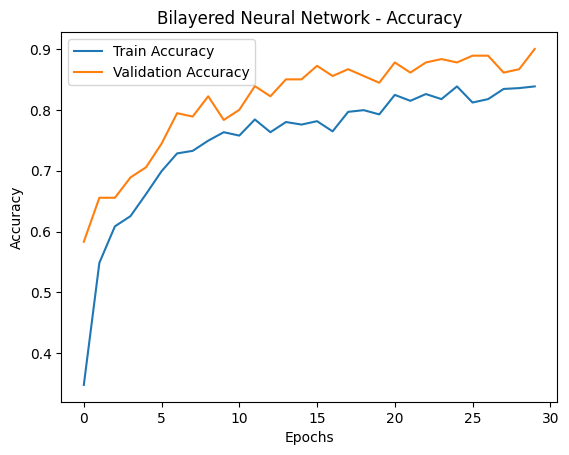

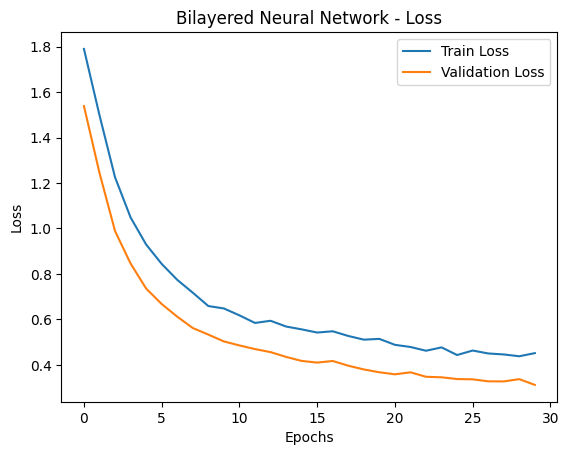

In [ ]:
# Plot accuracy
plt.plot(bilayer_history.history['accuracy'], label='Train Accuracy')
plt.plot(bilayer_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bilayered Neural Network - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(bilayer_history.history['loss'], label='Train Loss')
plt.plot(bilayer_history.history['val_loss'], label='Validation Loss')
plt.title('Bilayered Neural Network - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

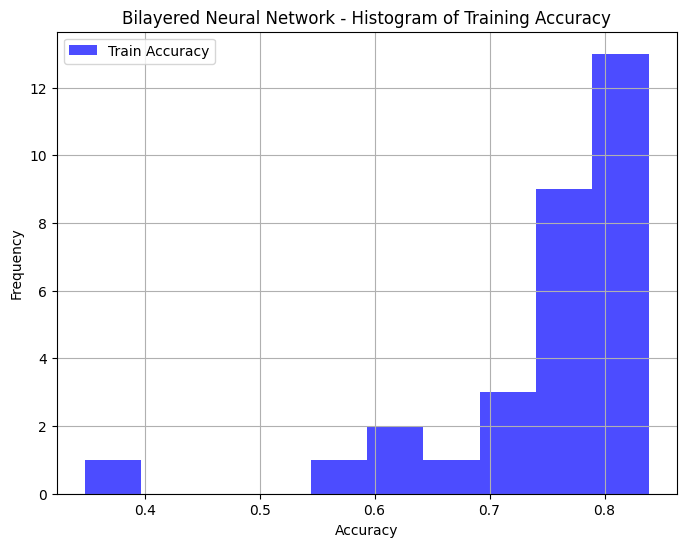

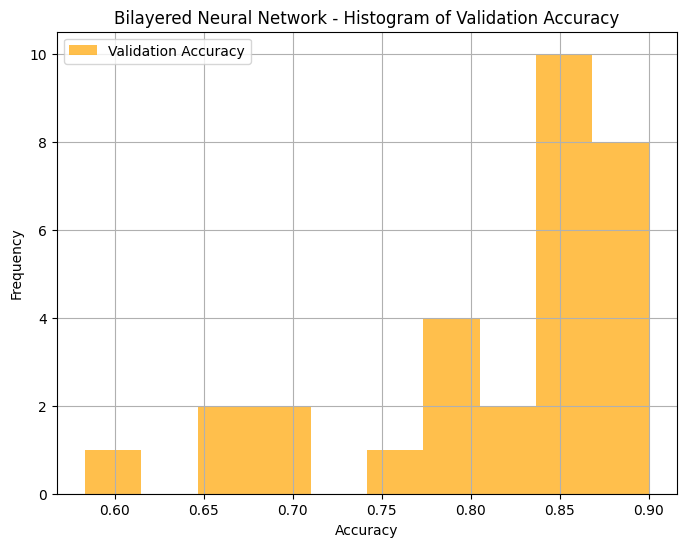

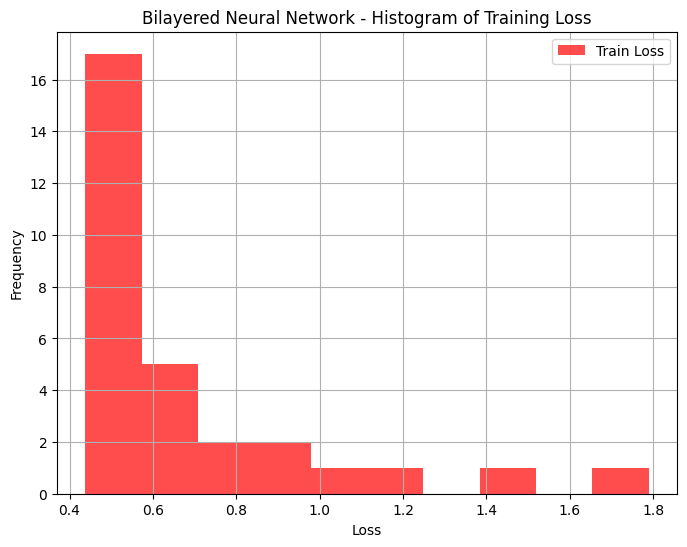

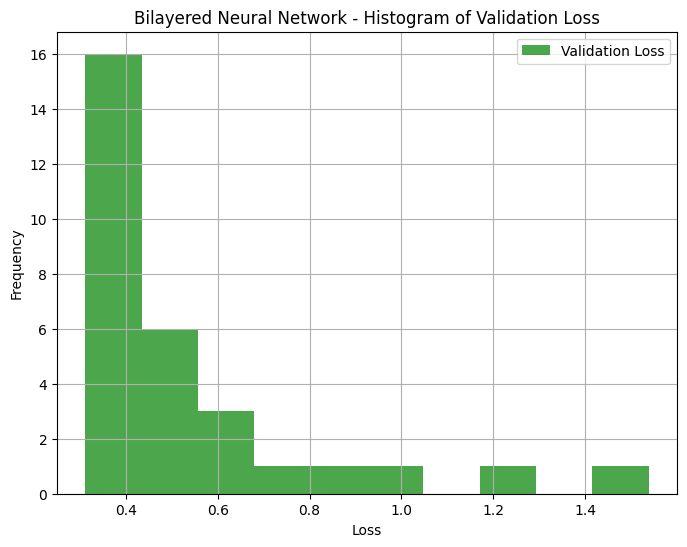

In [ ]:
# Extract metrics
train_accuracy = bilayer_history.history['accuracy']
val_accuracy = bilayer_history.history['val_accuracy']
train_loss = bilayer_history.history['loss']
val_loss = bilayer_history.history['val_loss']

# Plot 1: Histogram of Training Accuracy
plt.figure(figsize=(8, 6))
plt.hist(train_accuracy, bins=10, color='blue', alpha=0.7, label='Train Accuracy')
plt.title('Bilayered Neural Network - Histogram of Training Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Histogram of Validation Accuracy
plt.figure(figsize=(8, 6))
plt.hist(val_accuracy, bins=10, color='orange', alpha=0.7, label='Validation Accuracy')
plt.title('Bilayered Neural Network - Histogram of Validation Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Histogram of Training Loss
plt.figure(figsize=(8, 6))
plt.hist(train_loss, bins=10, color='red', alpha=0.7, label='Train Loss')
plt.title('Bilayered Neural Network - Histogram of Training Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Histogram of Validation Loss
plt.figure(figsize=(8, 6))
plt.hist(val_loss, bins=10, color='green', alpha=0.7, label='Validation Loss')
plt.title('Bilayered Neural Network - Histogram of Validation Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


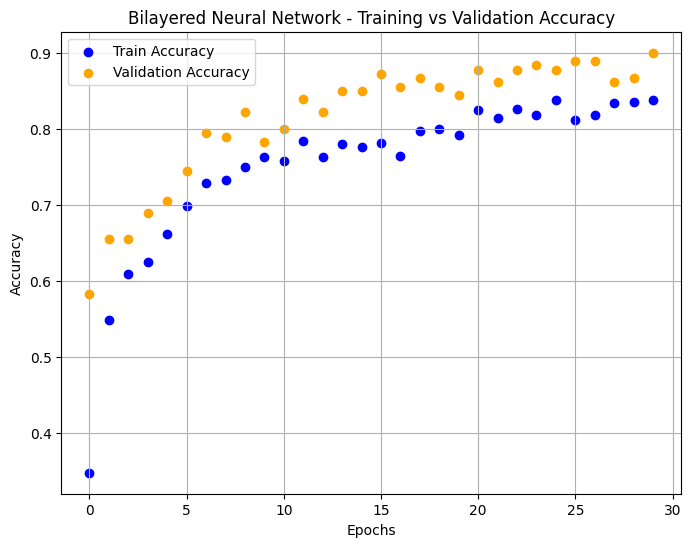

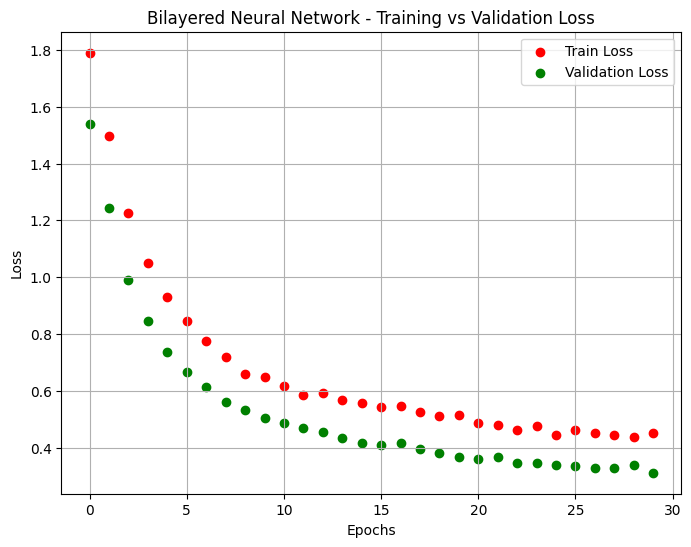

In [ ]:
# Scatter Plot: Training vs. Validation Accuracy
plt.figure(figsize=(8, 6))
plt.scatter(range(len(bilayer_history.history['accuracy'])), bilayer_history.history['accuracy'], color='blue', label='Train Accuracy')
plt.scatter(range(len(bilayer_history.history['val_accuracy'])), bilayer_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.title('Bilayered Neural Network - Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot: Training vs. Validation Loss
plt.figure(figsize=(8, 6))
plt.scatter(range(len(bilayer_history.history['loss'])), bilayer_history.history['loss'], color='red', label='Train Loss')
plt.scatter(range(len(bilayer_history.history['val_loss'])), bilayer_history.history['val_loss'], color='green', label='Validation Loss')
plt.title('Bilayered Neural Network - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# **Tri-Layer Neural Network for Multi-Class Classification**

In [ ]:
trilayer_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
trilayer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
trilayer_history = trilayer_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2713 - loss: 1.8850 - val_accuracy: 0.6278 - val_loss: 1.6901
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4486 - loss: 1.6768 - val_accuracy: 0.6389 - val_loss: 1.4370
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4904 - loss: 1.5189 - val_accuracy: 0.6500 - val_loss: 1.2037
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5368 - loss: 1.3563 - val_accuracy: 0.6556 - val_loss: 1.0299
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5961 - loss: 1.2097 - val_accuracy: 0.6556 - val_loss: 0.9436
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6039 - loss: 1.1151 - val_accuracy: 0.6556 - val_loss: 0.8620
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6156 - loss: 1.0764 - val_accuracy: 0.6833 - val_loss: 0.7865
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6581 - loss: 0.9129 - val_accuracy: 0.7000 - val_loss

In [ ]:
trilayer_loss, trilayer_accuracy = trilayer_model.evaluate(X_test, y_test, verbose=0)
print(f"Trilayered Model - Test Accuracy: {trilayer_accuracy * 100:.2f}%")
print(f"Trilayered Model - Test Loss: {trilayer_loss:.4f}")


Trilayered Model - Test Accuracy: 93.33%
Trilayered Model - Test Loss: 0.3116


**Data Visualization for Tri-Layer Neural Network**

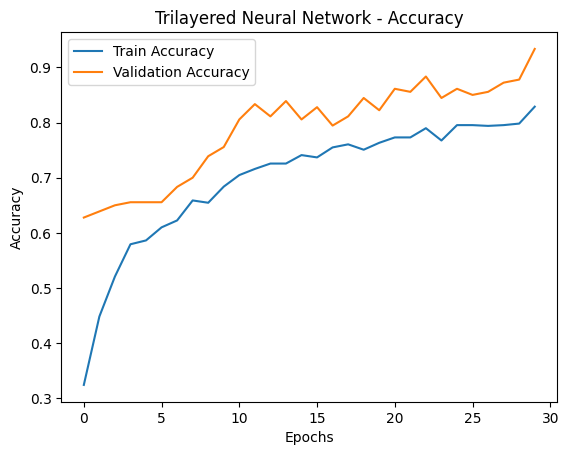

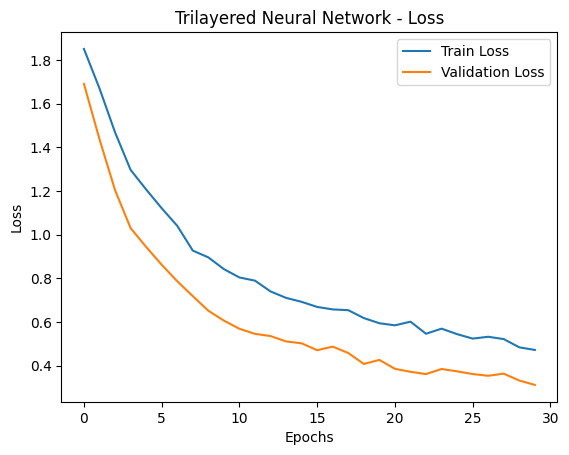

In [ ]:
plt.plot(trilayer_history.history['accuracy'], label='Train Accuracy')
plt.plot(trilayer_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Trilayered Neural Network - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(trilayer_history.history['loss'], label='Train Loss')
plt.plot(trilayer_history.history['val_loss'], label='Validation Loss')
plt.title('Trilayered Neural Network - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

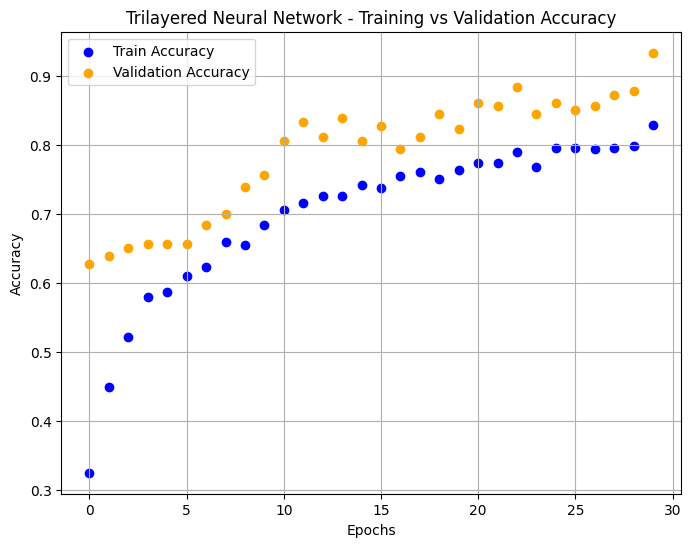

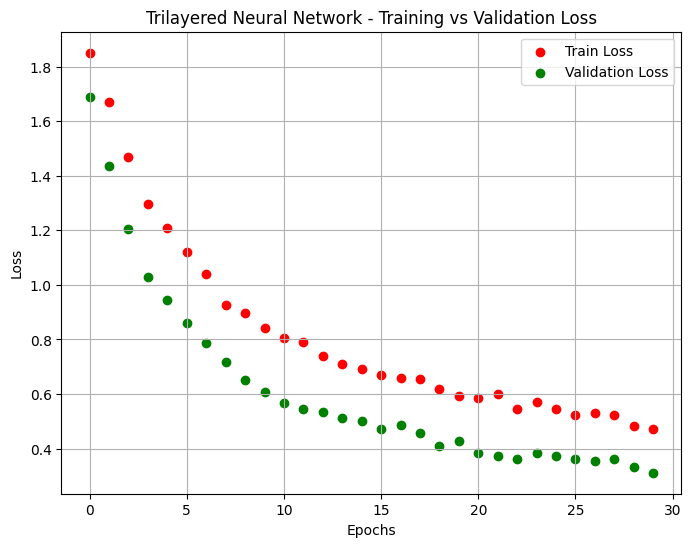

In [ ]:
# Scatter Plot: Training vs. Validation Accuracy
plt.figure(figsize=(8, 6))
plt.scatter(range(len(trilayer_history.history['accuracy'])), trilayer_history.history['accuracy'], color='blue', label='Train Accuracy')
plt.scatter(range(len(trilayer_history.history['val_accuracy'])), trilayer_history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.title('Trilayered Neural Network - Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot: Training vs. Validation Loss
plt.figure(figsize=(8, 6))
plt.scatter(range(len(trilayer_history.history['loss'])), trilayer_history.history['loss'], color='red', label='Train Loss')
plt.scatter(range(len(trilayer_history.history['val_loss'])), trilayer_history.history['val_loss'], color='green', label='Validation Loss')
plt.title('Trilayered Neural Network - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


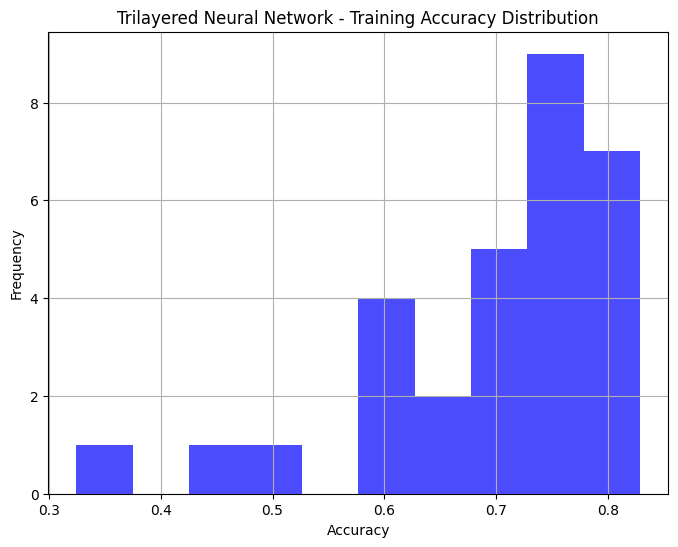

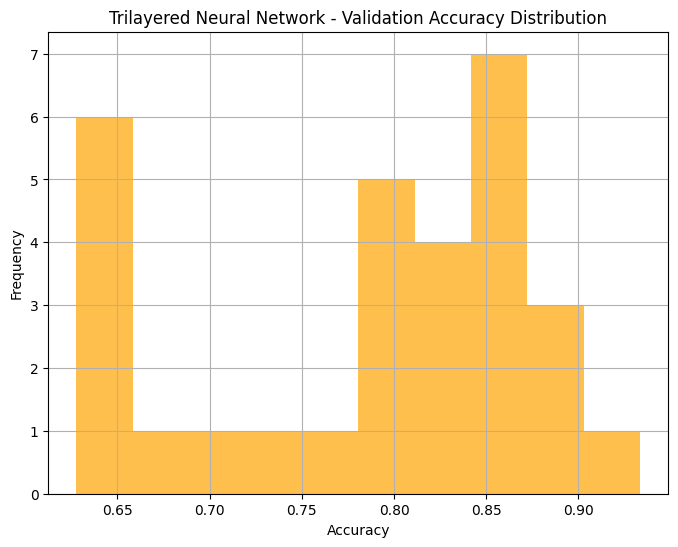

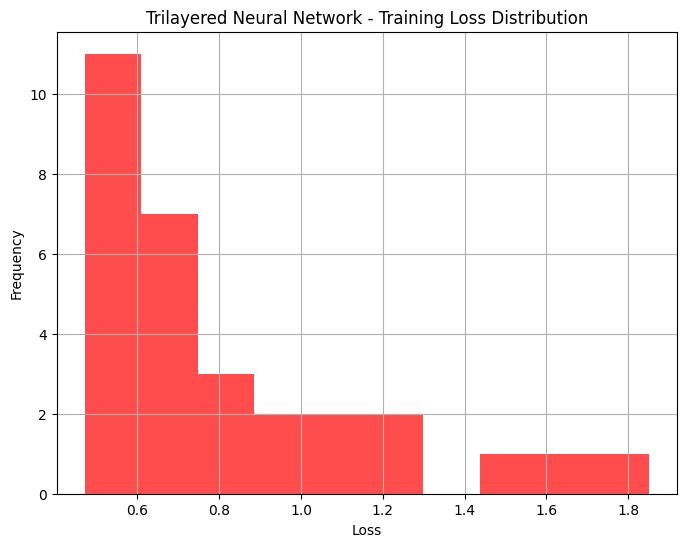

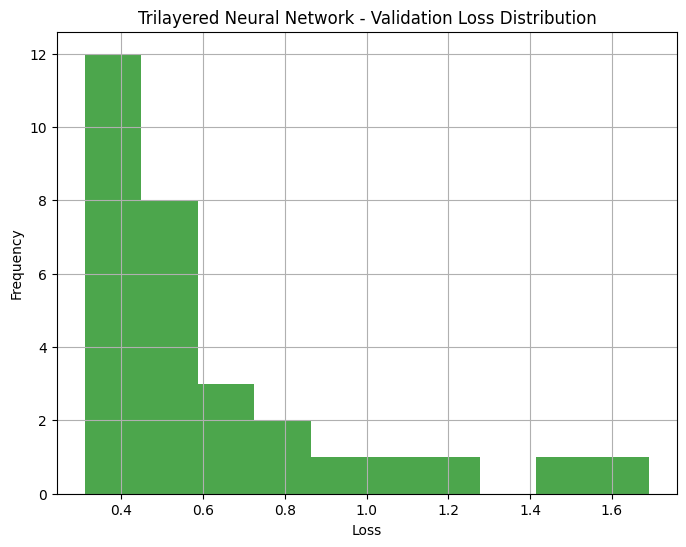

In [ ]:
# Histogram of Training Accuracy
plt.figure(figsize=(8, 6))
plt.hist(trilayer_history.history['accuracy'], bins=10, alpha=0.7, color='blue')
plt.title('Trilayered Neural Network - Training Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of Validation Accuracy
plt.figure(figsize=(8, 6))
plt.hist(trilayer_history.history['val_accuracy'], bins=10, alpha=0.7, color='orange')
plt.title('Trilayered Neural Network - Validation Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Histogram of Training Loss
plt.figure(figsize=(8, 6))
plt.hist(trilayer_history.history['loss'], bins=10, alpha=0.7, color='red')
plt.title('Trilayered Neural Network - Training Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of Validation Loss
plt.figure(figsize=(8, 6))
plt.hist(trilayer_history.history['val_loss'], bins=10, alpha=0.7, color='green')
plt.title('Trilayered Neural Network - Validation Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



# **Optimizable Neural Network for Multi-Class Classification**

**Hyperparameter** **Optimization,**  **Tuning** **with** **Keras** **Tuner**

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model(hp):
    model = Sequential()

    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation=hp.Choice('activation_layer1', values=['relu', 'tanh']),
        input_dim=X_train.shape[1]
    ))
    model.add(Dropout(hp.Float('dropout_layer1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation=hp.Choice('activation_layer2', values=['relu', 'tanh'])
    ))
    model.add(Dropout(hp.Float('dropout_layer2', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,  # The hypermodel function
    objective='val_accuracy',  # Metric to optimize
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Train the model twice per trial for more reliable results
    directory='tuner_results',  # Directory to save results
    project_name='optimizable_nn'  # Project name
)


In [ ]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)


Trial 10 Complete [00h 00m 11s]
val_accuracy: 0.9333333373069763

Best val_accuracy So Far: 0.9416666626930237
Total elapsed time: 00h 02m 11s


In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hyperparameters.values)

Best Hyperparameters: {'units_layer1': 96, 'activation_layer1': 'tanh', 'dropout_layer1': 0.4, 'units_layer2': 96, 'activation_layer2': 'relu', 'dropout_layer2': 0.30000000000000004, 'learning_rate': 0.002834624210999378}


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy* 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9497 - loss: 0.2647  
Test Loss: 0.25554922223091125
Test Accuracy: 95.00%


In [ ]:
history = best_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,  # You can adjust the epochs if needed
    batch_size=32
)

# Verify the metrics available in the history object
print("Available metrics:", history.history.keys())


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8451 - loss: 0.3933 - val_accuracy: 0.8889 - val_loss: 0.2943
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8432 - loss: 0.3916 - val_accuracy: 0.9111 - val_loss: 0.2503
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8499 - loss: 0.3788 - val_accuracy: 0.9278 - val_loss: 0.2596
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8275 - loss: 0.4138 - val_accuracy: 0.9111 - val_loss: 0.2367
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8820 - loss: 0.3199 - val_accuracy: 0.9000 - val_loss: 0.2523
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8442 - loss: 0.4515 - val_accuracy: 0.9056 - val_loss: 0.2575
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8463 - loss: 0.3805 - val_accuracy: 0.8778 - val_loss: 0.3380
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8301 - loss: 0.3969 - val_accuracy: 0.8889 - val_lo

In [ ]:
best_model.save('optimized_nn_model.h5')

**Data Visualization for Optimizable Neural Network**

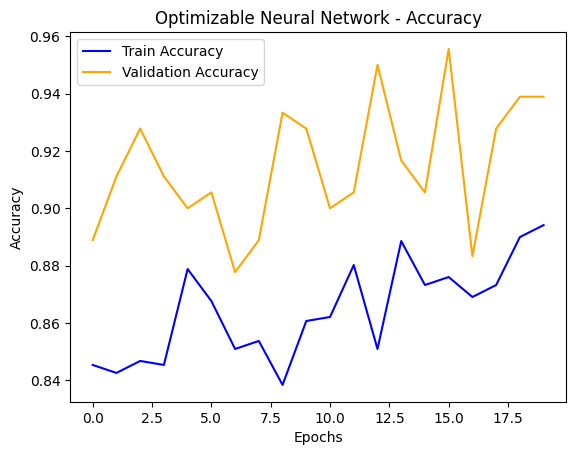

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Optimizable Neural Network - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


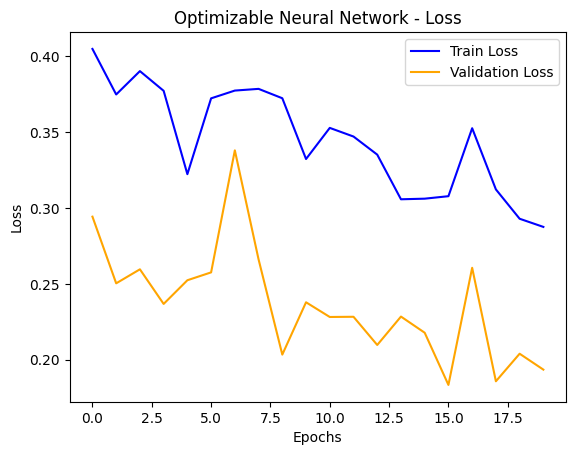

In [ ]:
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Optimizable Neural Network - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


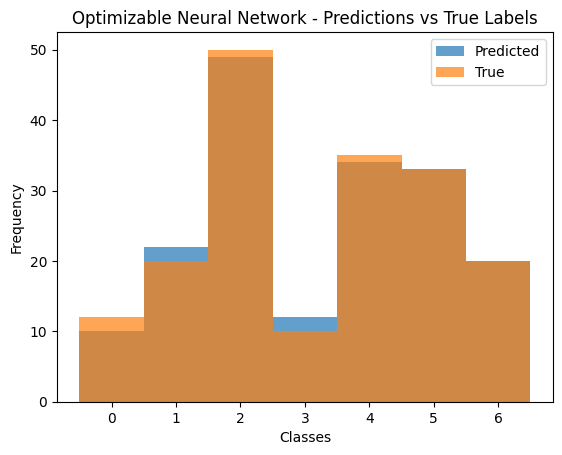

In [ ]:
# Get predictions
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Plot histogram
plt.hist(y_pred_classes, bins=np.arange(0, y_test.shape[1] + 1) - 0.5, alpha=0.7, label='Predicted')
plt.hist(y_true_classes, bins=np.arange(0, y_test.shape[1] + 1) - 0.5, alpha=0.7, label='True')
plt.title('Optimizable Neural Network - Predictions vs True Labels')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.legend()
plt.show()


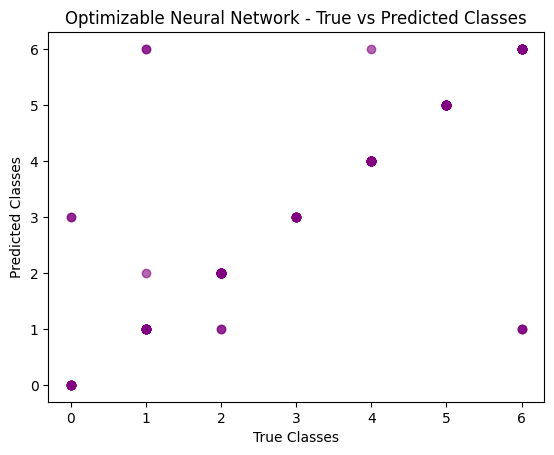

In [ ]:
plt.scatter(y_true_classes, y_pred_classes, alpha=0.6, color='purple')
plt.title('Optimizable Neural Network - True vs Predicted Classes')
plt.xlabel('True Classes')
plt.ylabel('Predicted Classes')
plt.show()


# **Camparison of Four Models**

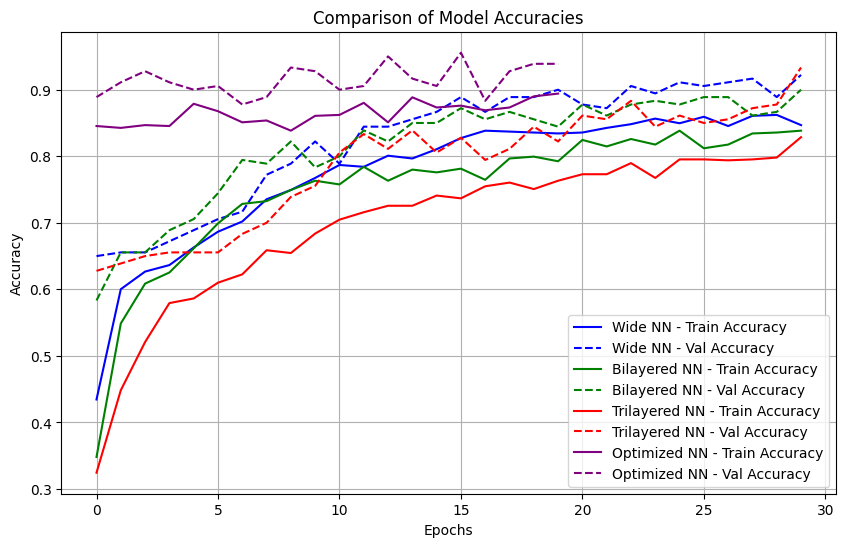

In [ ]:

plt.figure(figsize=(10, 6))

# Plot Wide Neural Network accuracy
plt.plot(wide_history.history['accuracy'], label='Wide NN - Train Accuracy', linestyle='-', color='blue')
plt.plot(wide_history.history['val_accuracy'], label='Wide NN - Val Accuracy', linestyle='--', color='blue')

# Plot Bilayered Neural Network accuracy
plt.plot(bilayer_history.history['accuracy'], label='Bilayered NN - Train Accuracy', linestyle='-', color='green')
plt.plot(bilayer_history.history['val_accuracy'], label='Bilayered NN - Val Accuracy', linestyle='--', color='green')

# Plot Trilayered Neural Network accuracy
plt.plot(trilayer_history.history['accuracy'], label='Trilayered NN - Train Accuracy', linestyle='-', color='red')
plt.plot(trilayer_history.history['val_accuracy'], label='Trilayered NN - Val Accuracy', linestyle='--', color='red')

# Plot Optimized Neural Network accuracy
plt.plot(history.history['accuracy'], label='Optimized NN - Train Accuracy', linestyle='-', color='purple')
plt.plot(history.history['val_accuracy'], label='Optimized NN - Val Accuracy', linestyle='--', color='purple')

# Graph styling
plt.title('Comparison of Model Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


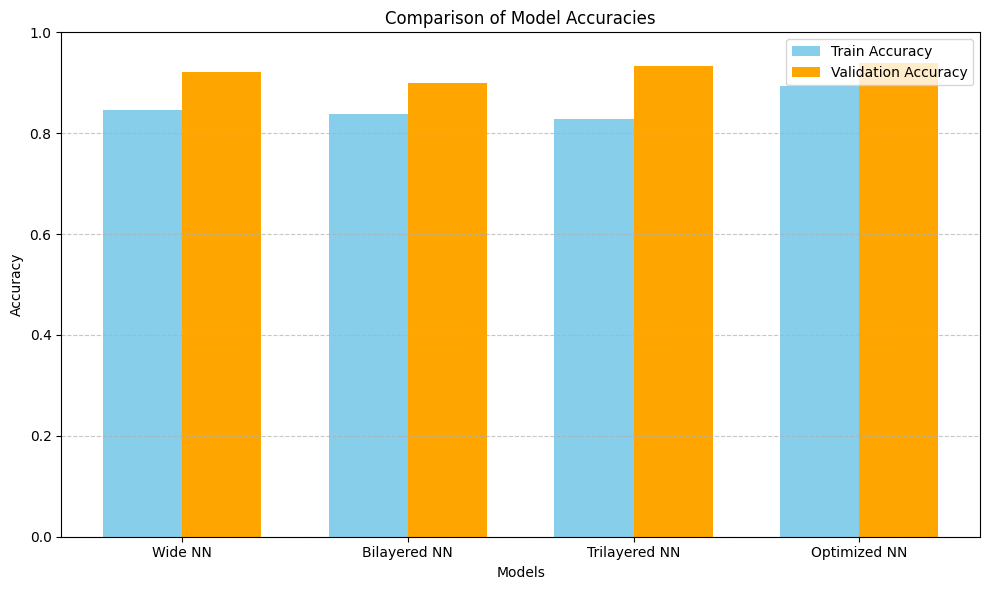

In [ ]:
import numpy as np

# Assuming the final accuracy values are as follows:
# Replace these with the actual final accuracy values from your models
models = ['Wide NN', 'Bilayered NN', 'Trilayered NN', 'Optimized NN']
train_accuracies = [
    wide_history.history['accuracy'][-1],
    bilayer_history.history['accuracy'][-1],
    trilayer_history.history['accuracy'][-1],
    history.history['accuracy'][-1],
]
val_accuracies = [
    wide_history.history['val_accuracy'][-1],
    bilayer_history.history['val_accuracy'][-1],
    trilayer_history.history['val_accuracy'][-1],
    history.history['val_accuracy'][-1],
]

# Bar width
bar_width = 0.35
x = np.arange(len(models))

# Plotting
plt.figure(figsize=(10, 6))

# Bars for training accuracy
plt.bar(x - bar_width / 2, train_accuracies, bar_width, label='Train Accuracy', color='skyblue')

# Bars for validation accuracy
plt.bar(x + bar_width / 2, val_accuracies, bar_width, label='Validation Accuracy', color='orange')

# Styling
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(x, models)  # Set x-axis labels to model names
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# **Feature Selection: Correlation Analysis and Removal of Redundant Features**

In [ ]:
# Handle missing values if any
excel_data = excel_data.dropna()

# Separate features and target
X = excel_data.drop(columns=['Class'])  # Replace 'Class' with your target column name
y = excel_data['Class']

# One-hot encode target if necessary
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_one_hot = to_categorical(y_encoded)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

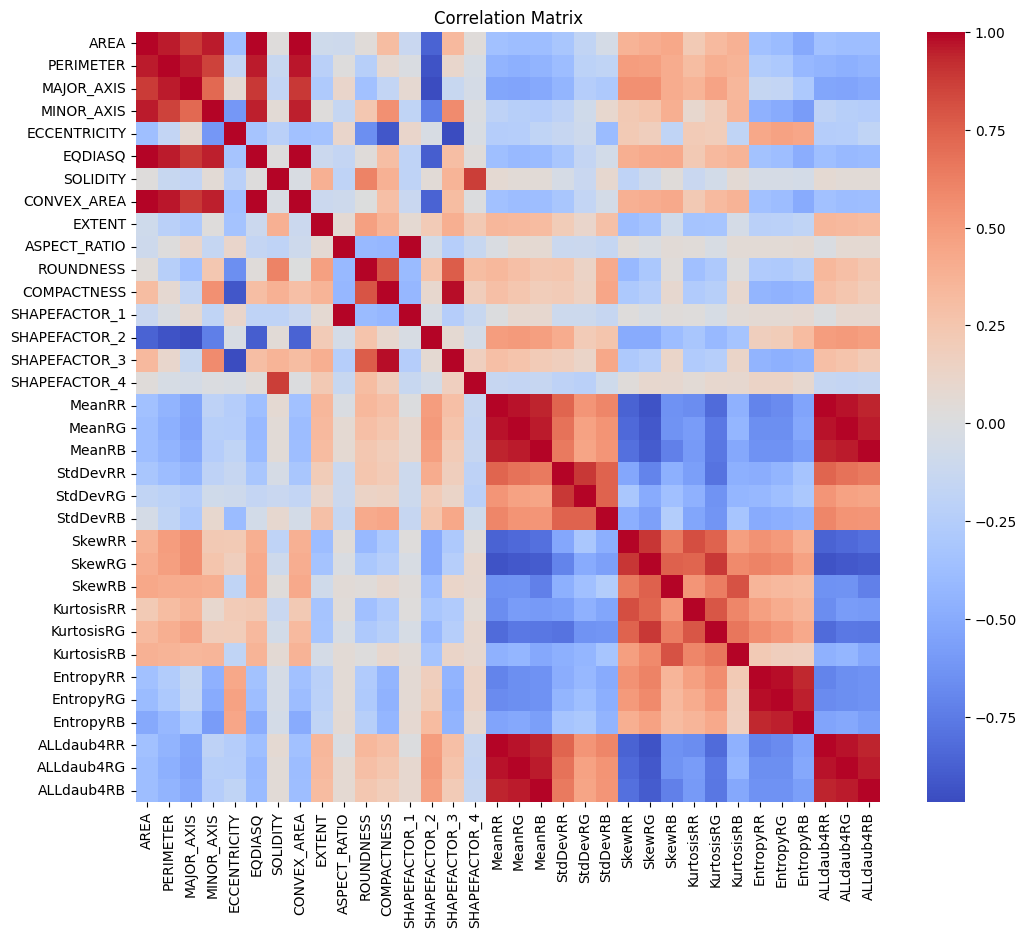

Reduced features: Index(['AREA', 'ECCENTRICITY', 'SOLIDITY', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'SHAPEFACTOR_4', 'MeanRR', 'StdDevRR', 'StdDevRG',
       'StdDevRB', 'SkewRR', 'SkewRB', 'KurtosisRR', 'KurtosisRG',
       'KurtosisRB', 'EntropyRR'],
      dtype='object')


In [ ]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Remove highly correlated features
threshold = 0.9  # Set a threshold for correlation
to_drop = []
columns = correlation_matrix.columns

for i in range(len(columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            to_drop.append(columns[i])

# Drop redundant features
X_reduced = X.drop(columns=to_drop)
print("Reduced features:", X_reduced.columns)


**Optimizable Neural Network using Hyperparameter Tuning.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_one_hot, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
joblib.dump(scaler, 'scaler1.pkl')
X_test = scaler.transform(X_test)


In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import keras_tuner as kt

# Define a function for the model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=256, step=32),
                    activation=hp.Choice('activation_input', ['relu', 'tanh']),
                    input_dim=X_train.shape[1]))

    model.add(Dropout(hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.1)))

    # Add hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                        activation=hp.Choice(f'activation_{i}', ['relu', 'tanh'])))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    directory='my_tuning',
    project_name='feature_reduction_nn'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Trial 30 Complete [00h 00m 07s]
val_accuracy: 0.9388889074325562

Best val_accuracy So Far: 0.9555555582046509
Total elapsed time: 00h 02m 33s


In [ ]:
# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.196115180850029
Test Accuracy: 0.9555555582046509


In [ ]:
best_model.save('optimized_reduced_nn_model.h5')

In [ ]:
# Save the reduced features for future reference
selected_features = X_reduced.columns
selected_features.to_frame().to_csv('selected_features1.csv', index=False)
print("Saved selected features for frontend integration.")

Saved selected features for frontend integration.


**Selected** **Features**

In [ ]:
import pandas as pd

# Save the reduced features for future reference
selected_features = X_reduced.columns
print("Selected features for frontend integration:")
print(selected_features)

# Convert the selected features to a DataFrame
selected_features_df = pd.DataFrame(selected_features, columns=["Selected Features"])

# Save to an HDF5 file
selected_features_df.to_hdf('selected_features.h5', key='features', mode='w')
print("Saved selected features to 'selected_features.h5'.")

Selected features for frontend integration:
Index(['AREA', 'ECCENTRICITY', 'SOLIDITY', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'SHAPEFACTOR_4', 'MeanRR', 'StdDevRR', 'StdDevRG',
       'StdDevRB', 'SkewRR', 'SkewRB', 'KurtosisRR', 'KurtosisRG',
       'KurtosisRB', 'EntropyRR'],
      dtype='object')
Saved selected features to 'selected_features.h5'.


**Accuracy Comparision between All vs Reduced Features**

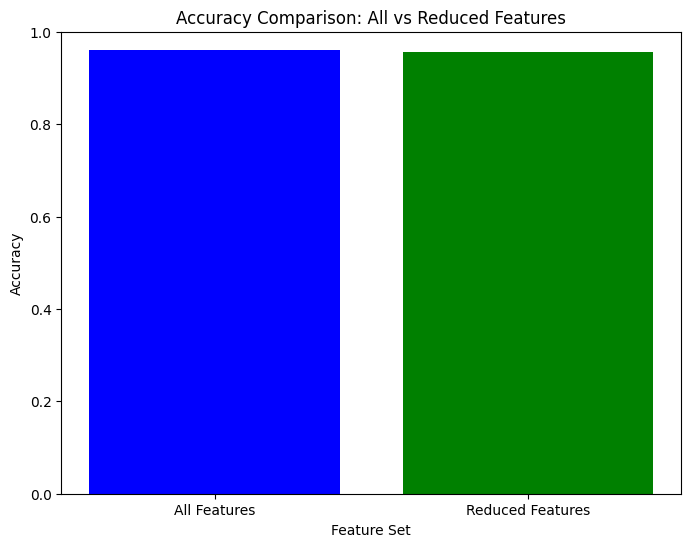

In [ ]:
import matplotlib.pyplot as plt

feature_counts = [34, len(X_reduced.columns)]
accuracies = [ 0.9611111283302307, test_accuracy]  # Replace `initial_accuracy` with the accuracy of all features

plt.figure(figsize=(8, 6))
plt.bar(['All Features', 'Reduced Features'], accuracies, color=['blue', 'green'])
plt.xlabel('Feature Set')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: All vs Reduced Features')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()